<a href="https://colab.research.google.com/github/Rusagor/WP/blob/master/16_%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добейтесь точности не менее 90% на проверочной выборке на базе трех иномарок. Размер проверочной выборки - 20%.

**Иморт библиотек**

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta, SGD # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Распознавание марок машин

In [ ]:
!unzip -q "/content/drive/My Drive/Базы/middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 10 #Размер выборки
img_width = 288 #Ширина изображения
img_height = 162 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


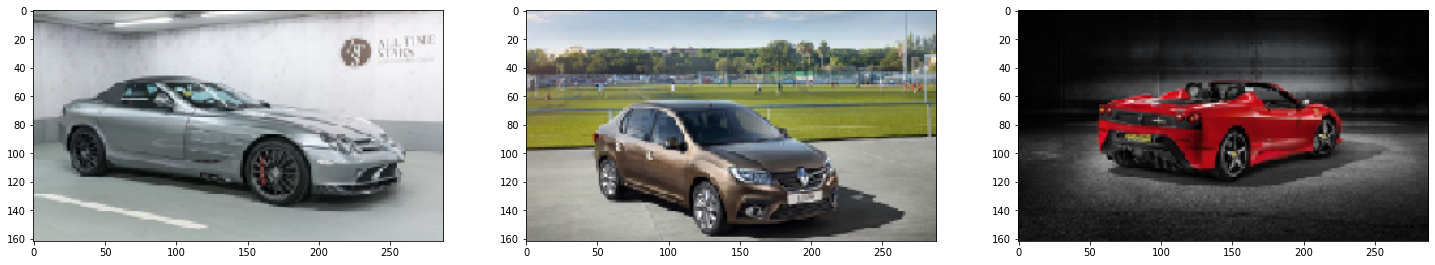

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
#Второй сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Третий сверточный слой
#model.add(Dropout(0.35))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Третий сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.3))
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Слой регуляризации Dropout
model.add(Dropout(0.3))
#Пятый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
#model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#Слой регуляризации Dropout
model.add(Dropout(0.3))
#Слой преобразования двумерных данных в одномерные 
model.add(Flatten())
#Полносвязный слой
model.add(Dense(2048, activation='elu'))
#Полносвязный слой
model.add(Dense(4096, activation='elu'))
#Вызодной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=60,
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
274/274 [==============================] - 63s 230ms/step - loss: 1.0849 - accuracy: 0.3648 - val_loss: 1.0817 - val_accuracy: 0.4088
Epoch 2/60
274/274 [==============================] - 62s 226ms/step - loss: 0.9373 - accuracy: 0.5342 - val_loss: 0.9709 - val_accuracy: 0.5029
Epoch 3/60
274/274 [==============================] - 62s 226ms/step - loss: 0.8731 - accuracy: 0.5964 - val_loss: 1.1697 - val_accuracy: 0.4456
Epoch 4/60
274/274 [==============================] - 62s 227ms/step - loss: 0.8464 - accuracy: 0.5935 - val_loss: 0.9079 - val_accuracy: 0.5529
Epoch 5/60
274/274 [==============================] - 62s 226ms/step - loss: 0.8129 - accuracy: 0.6257 - val_loss: 0.9163 - val_accuracy: 0.5765
Epoch 6/60
274/274 [==============================] - 62s 226ms/step - loss: 0.7894 - accuracy: 0.6458 - val_loss: 0.8585 - val_accuracy: 0.6074
Epoch 7/60
274/274 [==============================] - 

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])

In [ ]:
#history = model.fit_generator(
#    train_generator,
#    steps_per_epoch = train_generator.samples // batch_size,
#    validation_data = validation_generator, 
#    validation_steps = validation_generator.samples // batch_size,
#    epochs=20,
#    verbose=1
#)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50
274/274 [==============================] - 63s 229ms/step - loss: 0.0177 - accuracy: 0.9938 - val_loss: 0.4883 - val_accuracy: 0.8588
Epoch 2/50
274/274 [==============================] - 62s 227ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.4769 - val_accuracy: 0.8897
Epoch 3/50
274/274 [==============================] - 62s 228ms/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.5058 - val_accuracy: 0.8706
Epoch 4/50
274/274 [==============================] - 62s 227ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.5364 - val_accuracy: 0.8794
Epoch 5/50
274/274 [==============================] - 62s 228ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.5496 - val_accuracy: 0.8779
Epoch 6/50
274/274 [==============================] - 63s 229ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.6217 - val_accuracy: 0.8691
Epoch 7/50
274/274 [==============================] - 62s 228ms/step - loss: 0.0040 - accuracy: 0.9982 - val_loss: 0.6649 - val_ac

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

Epoch 1/20
274/274 [==============================] - 62s 227ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.8719 - val_accuracy: 0.8868
Epoch 2/20
274/274 [==============================] - 62s 228ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 1.0379 - val_accuracy: 0.8691
Epoch 3/20
274/274 [==============================] - 62s 227ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 0.8984 - val_accuracy: 0.8809
Epoch 4/20
274/274 [==============================] - 63s 228ms/step - loss: 2.8386e-04 - accuracy: 1.0000 - val_loss: 0.9144 - val_accuracy: 0.8779
Epoch 5/20
274/274 [==============================] - 62s 227ms/step - loss: 3.2203e-04 - accuracy: 1.0000 - val_loss: 1.0302 - val_accuracy: 0.8691
Epoch 6/20
274/274 [==============================] - 62s 227ms/step - loss: 2.2025e-04 - accuracy: 1.0000 - val_loss: 0.9960 - val_accuracy: 0.8706
Epoch 7/20
274/274 [==============================] - 62s 227ms/step - loss: 7.5946e-04 - accuracy: 0.9996 - val_loss:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 288, 162, 256)     7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 288, 162, 256)     590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 54, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 54, 512)       1180160   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 54, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 18, 512)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 18, 512)       2

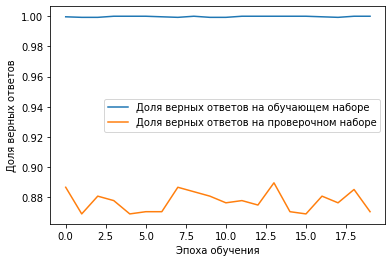

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()